In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #for plotting
from sklearn.ensemble import RandomForestClassifier #for the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz #plot tree
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.model_selection import train_test_split #for data splittingfrom pdpbox import pdp, info_plots #for partial plots
np.random.seed(123) #ensure reproducibility

pd.options.mode.chained_assignment = None  #hide any pandas warnings


In [72]:
StrokeData = pd.read_csv("up.csv")

In [73]:
StrokeData.columns = ['gender','age','hypertension','heart_disease','ever_married','work_type','residence_type','avg_glucose_level','bmi','smoking_status','stroke'

]

In [74]:
StrokeData = pd.get_dummies(StrokeData, drop_first=True)

In [75]:
StrokeData.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,0.981345,0.0,1.0,1.0,4.0,0.0,2.777699,0.981345,1.0,1.0
1,1.0,0.981345,0.0,1.0,1.0,4.0,0.0,2.777699,0.981345,1.0,1.0
2,1.0,0.981345,0.0,1.0,1.0,4.0,0.0,2.777699,0.981345,1.0,1.0
3,1.0,0.981345,0.0,1.0,1.0,4.0,0.0,2.777699,0.981345,1.0,1.0
4,1.0,0.981345,0.0,1.0,1.0,4.0,0.0,2.777699,0.981345,1.0,1.0


In [76]:
StrokeData.stroke.value_counts()

1.0    4807
0.0    4700
Name: stroke, dtype: int64

In [77]:
X_train, X_test, y_train, y_test = train_test_split(StrokeData.drop('stroke', 1), StrokeData['stroke'], test_size = .3, random_state=1000) #split the data

In [78]:
model = RandomForestClassifier(n_estimators=100,max_depth=5)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [79]:
estimator = model.estimators_[1]
features = [i for i in X_train.columns]
y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0.0'] = 'no disease'
y_train_str[y_train_str == '1.0'] = 'disease' 
y_train_str = y_train_str.values

In [80]:
# The the eport graphviz function will take in the paramters you apply output a file in the case a dot file
# you can specify the type of file you would specifically like 
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = features,
                class_names = y_train_str, 
                proportion = True, 
                label='root',
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'DecisionTree.png', '-Gdpi=600'])

# Here is allows it to be saved the local directory
from IPython.display import Image
Image(filename = 'DecisionTree.png')
# The result will be a tree with the training data

In [81]:
y_predict = model.predict(X_test)
y_pred_quant = model.predict_proba(X_test)[:, 1]
y_pred_bin = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_bin)
cm


array([[1139,  278],
       [ 522,  914]], dtype=int64)

In [82]:
total=sum(sum(cm))

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.6857314870559904
Specificity :  0.7667785234899329


0.8238807811237597

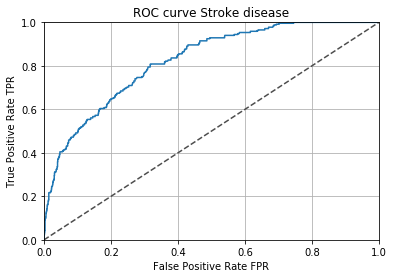

In [83]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 10
plt.title('ROC curve Stroke disease')
plt.xlabel('False Positive Rate FPR')
plt.ylabel('True Positive Rate TPR')
plt.grid(True)




auc(fpr, tpr)#Draw the ROC curve

Text(83.40000000000006, 0.5, 'predicted values')

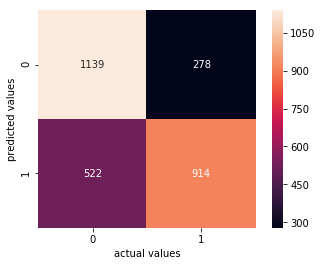

In [84]:
sns.heatmap(cm,square=True,annot=True,fmt='d')
plt.xlabel('actual values')
plt.ylabel('predicted values')#Draw the confusion matrix